In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import modred as mr
import numpy.matlib as ml
import scipy.interpolate as interp
from importlib import reload
import PODutil
import PIVutils

In [2]:
X, Y, U, V, W, Cond, Prof = PIVutils.importMatlabPIVdata2D('/Users/Owen/Dropbox/Data/ABL/Heat Flux Data/Processed Results/N/Neutral45_test1.mat',['X','Y','U','V','W'],['Cond','Prof'])

In [3]:
#Rearange data into correct shape (rows all the data for a single snapshot, columns each shapshot)
uSize = U.shape
uSize

(136, 133, 1000)

In [4]:
#Do 2D interpolation to remove any NaNs or find locations of NaNs 
#for i in range(uSize[2]):
#    U[:,:,i] = interp.interp2d(X, Y, U[:,:,i], kind='linear')

#Find the locations of all NaNs
NanLocs = np.isnan(U)
#U[NanLocs] = 0
    

In [5]:
#Calculate mean velocity profiles
Umean = np.nanmean(np.nanmean(U,axis=2),axis = 1)
Umean
Umean.shape
#print(Umean)

Umean = np.transpose(np.tile(Umean,(uSize[2],uSize[1],1)),(2,1,0))
#print(Umean.shape)

#Subtract mean velocity profiles from velocity fields
Uf = U - Umean;
Vf = V; #<--Mean in vertical is aprox zero
Wf = W
del Umean

/Users/Owen/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [6]:
#Set all NaNs to zero so that POD can run
Uf[NanLocs] = 0
Vf[NanLocs] = 0
Wf[NanLocs] = 0

###### Test shape of matrix needed for POD function
num_vecs = 50;  #<-- equivalent to the number of PIV snapshots (Also number of total POD modes)

vecs = np.random.random((100, num_vecs))
vecs.shape

In [8]:
uAll = np.concatenate((Uf.reshape(uSize[0]*uSize[1],uSize[2]), Vf.reshape(uSize[0]*uSize[1],uSize[2]), Wf.reshape(uSize[0]*uSize[1],uSize[2])), axis = 0)
uAll.shape      

(54264, 1000)

In [9]:
num_modes = 50;
modes, eig_vals = mr.compute_POD_matrices_snaps_method(uAll, list(range(num_modes)))

In [10]:
menergy = eig_vals/np.sum(eig_vals)

In [11]:
#Rearrange mode data to get mode fields
modeSize = modes.shape
Umodes = modes[0:uSize[0]*uSize[1],:];
Vmodes = modes[uSize[0]*uSize[1]:2*uSize[0]*uSize[1],:];
Wmodes = modes[2*uSize[0]*uSize[1]:modeSize[0]+1,:];
Umodes.shape

#Umodes = np.reshape(Umodes,(uSize[0],uSize[1],num_modes))
Umodes2 = np.zeros((uSize[0],uSize[1],num_modes))
Vmodes2 = np.zeros((uSize[0],uSize[1],num_modes))
Wmodes2 = np.zeros((uSize[0],uSize[1],num_modes))

for i in range(num_modes):
    #i=1
    Umodes2[:,:,i] = np.reshape(Umodes[:,i],(uSize[0],uSize[1]))
    Vmodes2[:,:,i] = np.reshape(Vmodes[:,i],(uSize[0],uSize[1]))
    Wmodes2[:,:,i] = np.reshape(Vmodes[:,i],(uSize[0],uSize[1]))        

    #Umodes.shape
    #uSize[0]*uSize[1]
    
Umodes = Umodes2 
Vmodes = Vmodes2
Wmodes = Wmodes2
del Umodes2,Vmodes2

fig, ax = plt.subplots()
ax.bar(range(num_modes),menergy[1:num_modes]*100)

In [15]:
Wmodes.shape

(136, 133, 50)

# Plot some modes

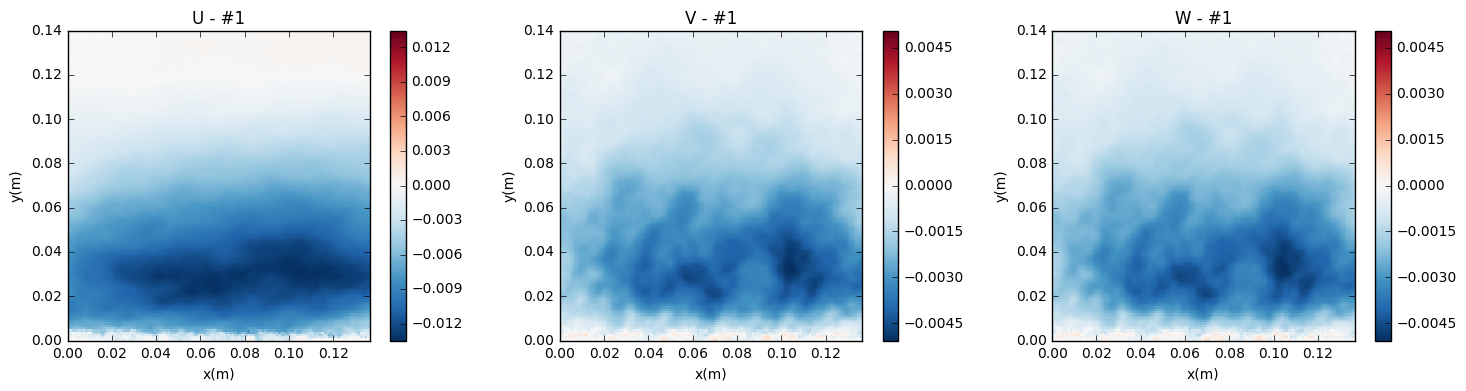

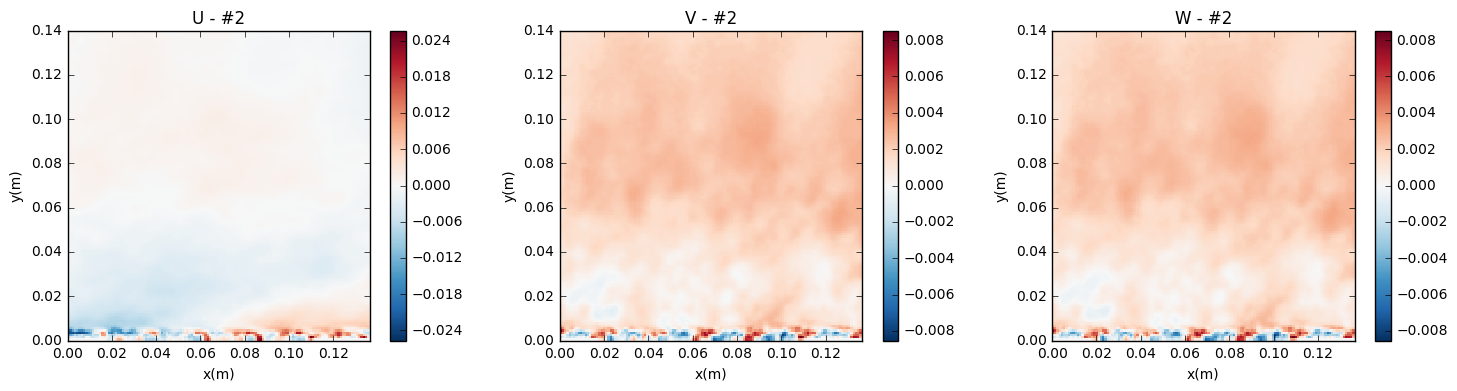

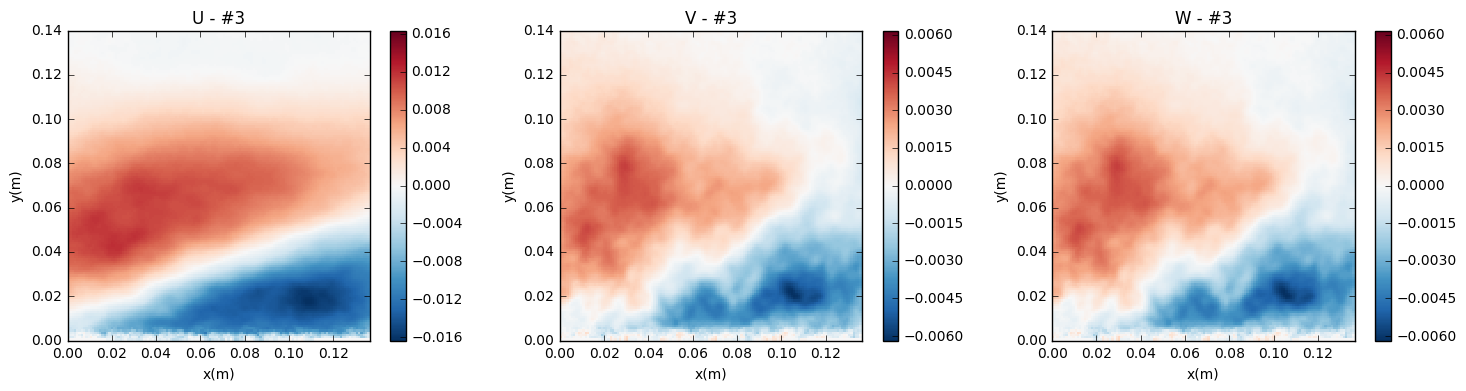

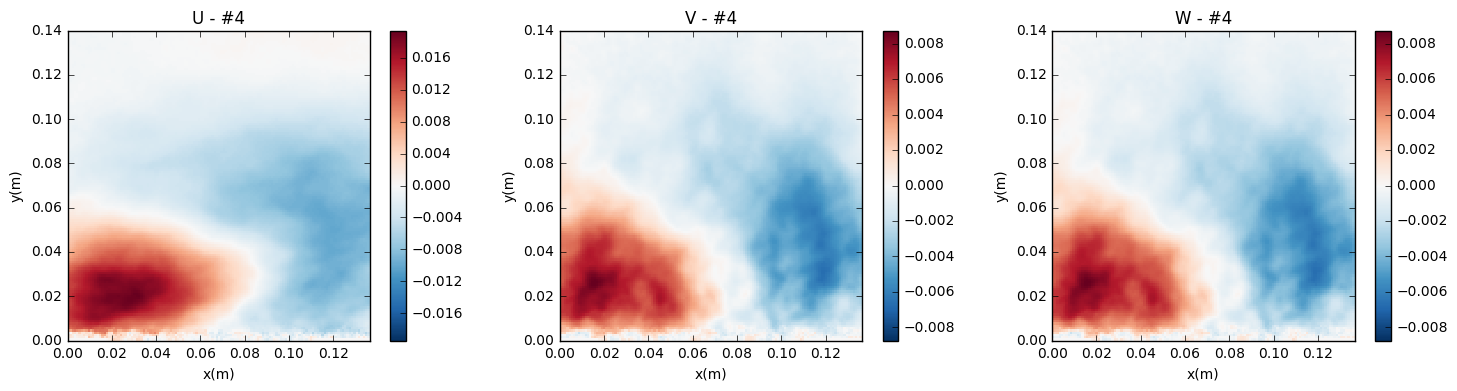

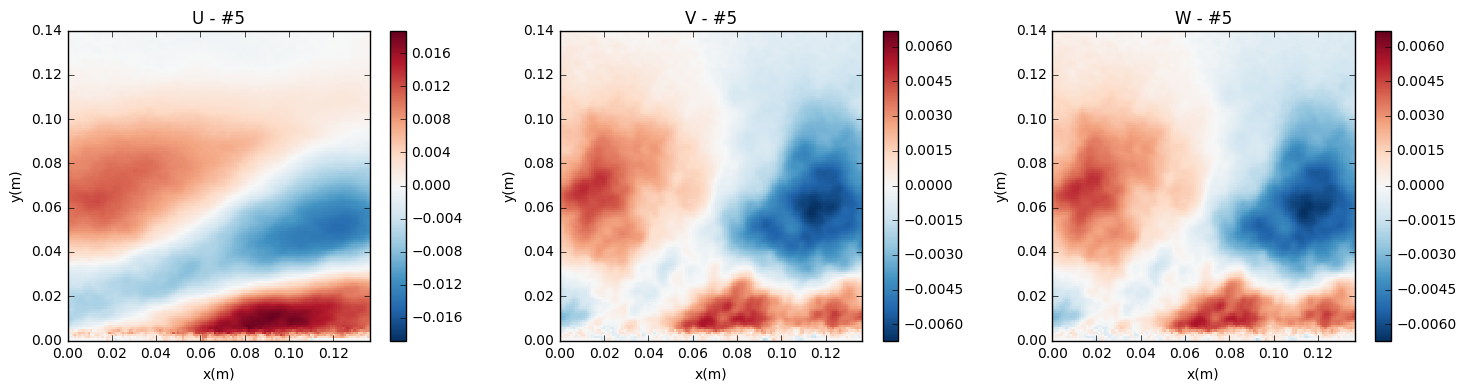

In [16]:
reload(PODutil)
PODutil.plotPODmodes3D(X,Y,Umodes,Vmodes,Wmodes,list(range(5)))